POLYNOMIAL REGRESSION RESULTS
Dataset: manufacturing.csv
Using First 50 Rows
Features: ['Temperature (°C)']
Target: Quality Rating
Polynomial Degree: 3
Mean Squared Error: 39.0308
R² Score: -2.2293


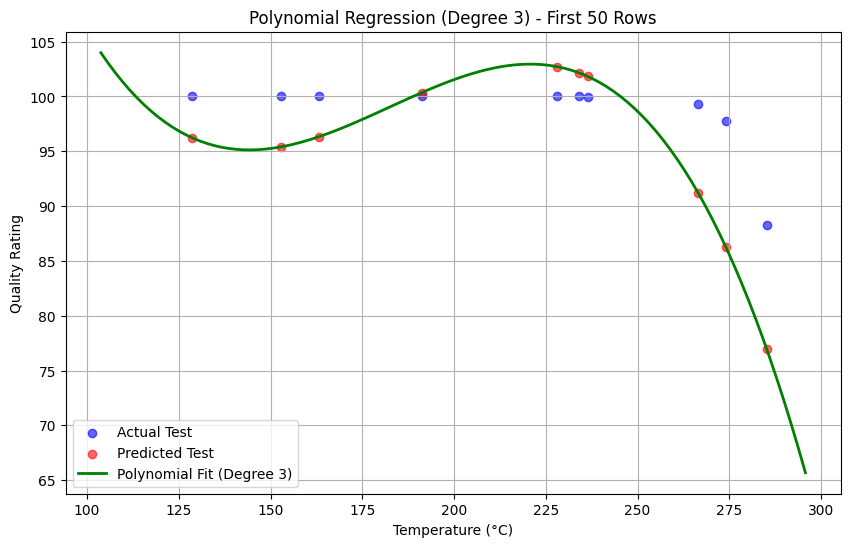

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

def polynomial_regression_from_csv(csv_file, feature_cols, target_col, degree=2, n_rows=50):
    """
    Perform polynomial regression from CSV file using first N rows.
    
    Parameters:
    csv_file (str): Path to CSV file
    feature_cols (list): List of feature column names
    target_col (str): Target column name
    degree (int): Degree of polynomial
    n_rows (int): Number of rows to use from dataset
    """
    
    # Load first N rows
    df = pd.read_csv(csv_file).head(n_rows)
    
    # Prepare features and target
    X = df[feature_cols]
    y = df[target_col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Create polynomial pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    
    # Train model
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = poly_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print("="*50)
    print("POLYNOMIAL REGRESSION RESULTS")
    print("="*50)
    print(f"Dataset: {csv_file}")
    print(f"Using First {n_rows} Rows")
    print(f"Features: {feature_cols}")
    print(f"Target: {target_col}")
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # ---------- Plotting ----------
    if len(feature_cols) == 1:
        # Smooth curve for visualization
        X_range = np.linspace(X.min().iloc[0], X.max().iloc[0], 100).reshape(-1, 1)
        X_range_df = pd.DataFrame(X_range, columns=feature_cols)
        y_range_pred = poly_model.predict(X_range_df)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Test')
        plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Predicted Test')
        plt.plot(X_range, y_range_pred, color='green', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
        plt.xlabel(feature_cols[0])
        plt.ylabel(target_col)
        plt.title(f'Polynomial Regression (Degree {degree}) - First {n_rows} Rows')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        # If multiple features → plot actual vs predicted
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"Actual vs Predicted - First {n_rows} Rows")
        plt.grid(True)
        plt.show()
    
    return poly_model, mse, r2


# Example usage
if __name__ == "__main__":
    csv_file = "manufacturing.csv"
    feature_columns = ["Temperature (°C)"]  # Or more features if needed
    target_column = "Quality Rating"
    
    model, mse, r2 = polynomial_regression_from_csv(
        csv_file, feature_columns, target_column, degree=3, n_rows=50
    )


# Polynomial Regression By Defining A Function
## 📝 Explanation

Imports: Uses pandas for CSV handling, numpy for numerical operations, matplotlib for plotting, and sklearn for ML tasks.

Function Input: Takes CSV path, feature columns, target column, polynomial degree, and number of rows to use.

- Step 1 – Load Data: Reads first n_rows of dataset into a DataFrame.

- Step 2 – Split Variables: Separates features (X) and target (y).

- Step 3 – Train-Test Split: Divides data into 80% training and 20% testing sets.

- Step 4 – Model Training: Uses Pipeline with PolynomialFeatures and LinearRegression.

- Step 5 – Predictions: Generates predicted values on test data.

- Step 6 – Evaluation: Computes MSE and R² Score.

- Step 7 – Output: Prints dataset details, polynomial degree, error metrics.

- Step 8 – Visualization: **1 feature → Plots actual vs predicted with polynomial curve.**
  **Multiple features → Plots actual vs predicted scatter plot.**

- Step 9 – Return: Returns trained model, MSE, and R² score.

This code provides a complete polynomial regression workflow with evaluation and visualization.

Also works with any CSV file by defining features and target columns.